# Visualizations using LDA and word embeddings on Facebook dataset.

This notebook is used for subsection 3. Can the relationship between words within a topic be visualized? In the this sub-question, a word embedding is createdbased on the sentences from each topic. The word embedding is used to create PCA, t-SNE, and UMAP of a Word2Vec model. In the projection, the most frequent words are shown.

In [2]:
#basic python methods
import pandas as pd 
import re
import numpy as np
import umap
from collections import Counter

#gensim models for topic modeling
#import gensim
import gensim.models.ldamodel

#visualizations tools

import matplotlib.pyplot as plt
from matplotlib import pyplot
from wordcloud import WordCloud
import seaborn as sns

#nlp tools
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

#embedding and dimension reduction 
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from adjustText import adjust_text
import umap

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Loading the dataset and removing empty rows.

In [4]:
df = pd.read_csv(r"C:\Users\User\Documents\Thesis\data\DRC_FB_25_July_2017_25_july_2019.csv", delimiter = ';')
print(len(df))
df.dropna()


88574


,message
0,Yaga Je pense bien que tout dépend de l'établi...
1,Nathalie Ntibibuka Merci de la part de l'auteure.
2,Joel Louvin Pourriez-vous nous préciser ce que...
3,Maïthé Bizabishaka Merci pour votre contribution.
4,Maïthé Bizabishaka Merci pour votre contribution.
...,...
88569,Nibaza K Umwalimu Cank Uwariwe Wese N Ukwiking...
88570,Humura Burundi
88571,Mugenzi kuba arisugi bitanga umunezero kk umub...
88572,Haha! Ntivyiroshe! Bazorihinyanyura


Stopword set is created for stopwords which are not nltk.

In [6]:
stopwords_mix = {'oya','ego','canke','amp','&amp','&amp', 'http', 'https', 'plus', 'contre', 'nest', 'cest' ,'après', 'cette', 'burundi', 'comme', 'burundais', 'ong','tout', 'sans',
                     'depuis', 'ils', 'si', 'tous','leurs', 'parti', 'ans', 'selon', 'info','faire',
                     'deux','fait','pace', 'period.','exceeding', 'year-earlier','soaring.'
                    , 'new', 'avoir','très','non','vient','où','quil','jour','encore','get','one', 
                     'like', 'need', 'since','time','last','got','know','well','real','via',"del","por","el","los",
                    "para","di","una","al","https","nhttps",'amp','&amp;','&','!','?',':','-',"alors","au","aucuns","aussi","autre","avant","avec","avoir", "aux","bon","car","ce","cela","ces","ceux","chaque","ci","comme","comment","dans","des",
                    "du","dedans","dehors","depuis","devrait","doit","donc","dos","début","elle","elles","en","encore","essai","est","et","eu","fait","faites","fois",
                    "font","hors","ici","il","ils","je","juste","la","le","les","leur","là","ma","maintenant","mais","mes","mine","moins","mon","mot","même","ni","nommés","notre","nous",
                    "ou","où","par","parce","pas","peut","peu","plupart","pour","pourquoi","quand","que","quel","quelle","quelles","quels","qui","sa","sans","ses",
                    "seulement","si","sien","son","sont","sous","soyes","sujet","sur","ta","tandis","tellement","tels","tes","ton","tous","tout","trop","très","tu","voient",
                    "un","une","vont","votre","vous","vu","ça","étaient","état","étions","été","être","ne","se","y","ont","nos","dit","dire",
                   "c","d","lui","l","moi","va","n","na","rien","autres","bien","sera","suis","vie","soit","quon",
                   "bonne","quils","jamais","entre","k","te","ourselves", "hers", "between", "yourself", "but", "again", "there", "about", "once", 
                     "during", "out", "very", "having", "with", "they", "own", "an", "be", "some", "for", 
                     "do", "de", "its", "yours", "such", "into", "of", "most", "itself", "other", "off", "is", "s", 
                     "am", "or", "who", "as", "from", "him", "each", "the", "themselves", "until", "below", "are", 
                     "we", "these", "your", "his", "through", "don", "nor", "me", "were", "her", "more", "himself", 
                     "this", "down", "should", "our", "their", "while", "above", "both", "up", "to", "ours", "had", 
                     "she", "all", "no", "when", "at", "any", "before", "them", "same", "and", "been", "have", "in", 
                     "will", "on", "does", "yourselves", "then", "that", "because", "what", "over", "why", "so", "can",
                     "did", "not", "now", "under", "he", "you", "herself", "has", "just", "where", "too", "only", "myself",
                     "which", "those", "i", "after", "few", "whom", "t", "being", "if", "theirs", "my", "against", "a", "by",
                     "doing", "it", "how", "further", "was", "here", "than", "https","nhttps",'amp','&amp;','&','!','?',':','-'}

Removing unwanted characters and stopwords

In [ ]:
def clean_message(current_message):
    new_string = ""
    p = re.compile('@[a-zA-Z]+')
    findall = p.findall(str(current_message))
    current_message = re.sub(r'@[a-zA-Z]+', '', str(current_message))
    current_message = re.sub(r'[^a-zA-Z ]', '', str(current_message))
    for word in current_message.lower().split(" "):
   
        if not word.startswith("@" or "#" or "http"):
            if not word in set(stopwords.words("english")):
                if not word in set(stopwords.words("french")):
                    if not word in set(stopwords.words("spanish")):
                        if not word in set(stopwords.words("spanish")):
                            if len(word) > 1:
                                if not word in stopwords_mix:
                     
                                    new_string += (str(word) + " ")
    return(new_string)

In [8]:
def tokenize_message(current_message):
    new_list = []
    p = re.compile('@[a-zA-Z]+')
    findall = p.findall(str(current_message))
    current_message = re.sub(r'@[a-zA-Z]+', '', str(current_message))
    current_message = re.sub(r'[^a-zA-Z ]', '', str(current_message))
    for word in current_message.lower().split(" "):
   
        if not word.startswith("@" or "#" or "http"):
            if not word in set(stopwords.words("english")):
                if not word in set(stopwords.words("french")):
                    if not word in set(stopwords.words("spanish")):
                        if len(word) > 1:
                            if not word in stopwords_mix:
                     
                                new_list.append(str(word))
    return(new_list)

Create dictionary and word corpus

In [ ]:
df.dropna()

df['message'] = df['message'].apply(clean_message)

df['tokenize_message'] = df['message'].apply(tokenize_message)

dictionary = gensim.corpora.Dictionary(df['tokenize_message'])

dictionary.filter_extremes(no_below=1, no_above=0.5, keep_n=1000)

bow_corpus = [dictionary.doc2bow(doc) for doc in df['tokenize_message']]

For each message the topic will be calculated.

In [ ]:
def score_LDA(message):
    bow_vector = dictionary.doc2bow(str(message).lower().split())
    scorelist = []
    for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]): 
        scorelist.append(index)
    return(scorelist[0])

df['LDA_score'] = df[message1].apply(score_LDA)

For each topic a barplot will be created with the most important words. 

In [ ]:
          

for x in range(number_of_topics):
    df_topic = df[df.LDA_score == x] 
    message = df_topic[message1]
    word_list = ['']
    for row in message:
        if type(row) == type(str()):
            row = row.split(" ")
            for word in row:
                if not word in twitter_list:
                    if not word.startswith("#"):
                        if not word.startswith("@"):
                            result = re.match("[a-zA-Z]", word)
                            if result:
                                word_list.append(word.replace("'", "").replace(" ", ""))

    cnt = Counter()
    for word in word_list:
        word = word.lower()
        cnt[word] += 1
    
    words = []
    numbers = []
    for word in cnt.most_common(25):
        words.append(word[0])
        numbers.append(word[1])
    
    labels = words
    men_means = numbers
    
    print(labels)

    x = np.arange(len(labels))  
    width = 0.60  

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width, men_means, width, color="#C7CEEA")

    ax.set_ylabel('Frequency')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation = 45, ha='right')
    ax.legend()
    def autolabel(rects):
    
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        rotation = 45,
                        textcoords="offset points",
                        
                        ha='center', va='bottom')


    autolabel(rects1)
    plt.show()

In [8]:
words = ['ko', 'mu', 'kuko', 'ngo', 'ivyo', 'ku', 'muri', 'imana', 'iyo', 'kandi', 'ariko', 'ari', 'aho', 'nkurunziza', 'ya', 'ico', 'amakuru', 'none', 'petero', 'uwo', 'kuri', 'uko', 'abarundi', 'abo', 'neza',
        'faut', 'pays', 'merci', 'dieu', 'yaga', 'jeunes', 'monde', 'toujours', 'gens', 'cas', 'pense', 'femmes', 'vs', 'quoi', 'cher', 'femme', 'question', 'dune', 'vraiment', 'temps', 'politique', 'dun', 'vos', 'chez', 'cet']

# PCA plot

For each topic, for the 25 most occuring words the vector distance is caculated (in an unique word dimensional space). The vector is created by using all the message in text as training featues. The vector is used form all three visualizations.

In [10]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 15
plt.rcParams["figure.figsize"] = fig_size

model = Word2Vec(message, min_count=1000)

X = model[model.wv.vocab]
pca = PCA(n_components=10)
Y = pca.fit_transform(X)

/home/sije/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


500

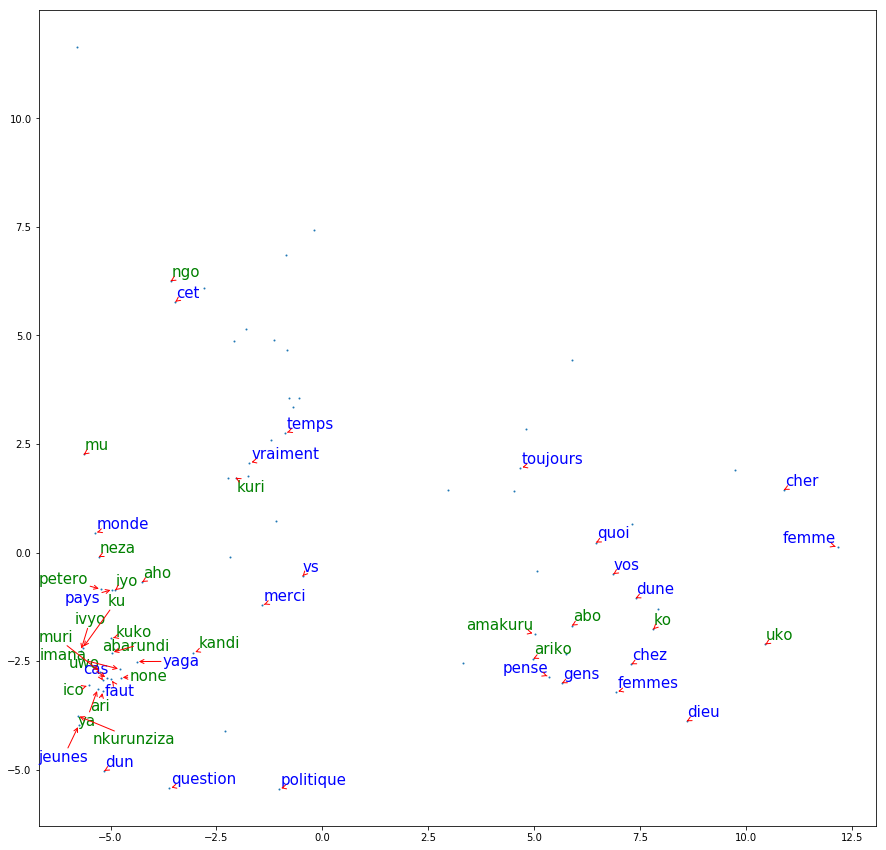

In [15]:
topicgroup={'ko':"green", 'mu':"green", 'kuko':"green", 'ngo':"green", 'ivyo':"green", 'ku':"green", 'muri':"green", 'imana':"green", 'iyo':"green", 'kandi':"green", 'ariko':"green", 'ari':"green", 'aho':"green", 'nkurunziza':"green", 'ya':"green", 'ico':"green", 'amakuru':"green", 'none':"green", 'petero':"green", 'uwo':"green", 'kuri':"green", 'uko':"green", 'abarundi':"green", 'abo':"green", 'neza':"green",
        'faut':"blue", 'pays':"blue", 'merci':"blue", 'dieu':"blue", 'yaga':"blue", 'jeunes':"blue", 'monde':"blue", 'toujours':"blue", 'gens':"blue", 'cas':"blue", 'pense':"blue", 'femmes':"blue", 'vs':"blue", 'quoi':"blue", 'cher':"blue", 'femme':"blue", 'question':"blue", 'dune':"blue", 'vraiment':"blue", 'temps':"blue", 'politique':"blue", 'dun':"blue", 'vos':"blue", 'chez':"blue", 'cet':"blue"}

pyplot.scatter(Y[:, 0], Y[:, 1],s=1)

texts = [plt.text(Y[i, 0], Y[i, 1], word, ha='center', va='center', size=15, color=topicgroup[word]) for i, word in enumerate(words)]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

# t-SNE PLOT

In [16]:
model = Word2Vec(message, min_count=1000)
X = model[model.wv.vocab]
Y = TSNE(n_components=2).fit_transform(X)
print(Y)

/home/sije/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


[[-1.47071686e+02 -7.20776062e+01]
 [ 5.55834389e+01 -2.77683449e+01]
 [ 7.23561554e+01  2.54108887e+01]
 [ 3.55359497e+01 -5.23496475e+01]
 [ 6.60471420e+01  4.56744270e+01]
 [ 7.64627762e+01  6.11594391e+01]
 [ 5.58118286e+01  6.66174164e+01]
 [ 5.06791420e+01  3.21264877e+01]
 [ 2.53445168e+01  4.34004326e+01]
 [ 2.83513546e+01  2.14013329e+01]
 [-8.85650330e+01 -2.35971241e+01]
 [ 9.61679230e+01  1.97218513e+01]
 [ 2.60828342e+01  6.76224365e+01]
 [ 1.21521408e+02  5.97735329e+01]
 [ 4.42747612e+01  8.56995926e+01]
 [ 6.79339523e+01  8.36431961e+01]
 [-1.00007607e+02 -3.94721489e+01]
 [ 8.84327011e+01  4.04423256e+01]
 [ 4.41314583e+01  5.08993034e+01]
 [ 1.14637283e+02  3.59303246e+01]
 [ 1.07169418e+01 -3.25494814e+00]
 [-1.24906761e+02  5.60842454e-01]
 [ 9.89268799e+01  5.74576645e+01]
 [-1.26845459e+02 -6.92476578e+01]
 [ 7.48284912e+01  2.15638503e-02]
 [ 8.90104980e+01  7.69172974e+01]
 [ 5.37329979e+01  1.09991379e+01]
 [ 3.40524197e-01  3.23613281e+01]
 [-1.52339310e+02  4

8

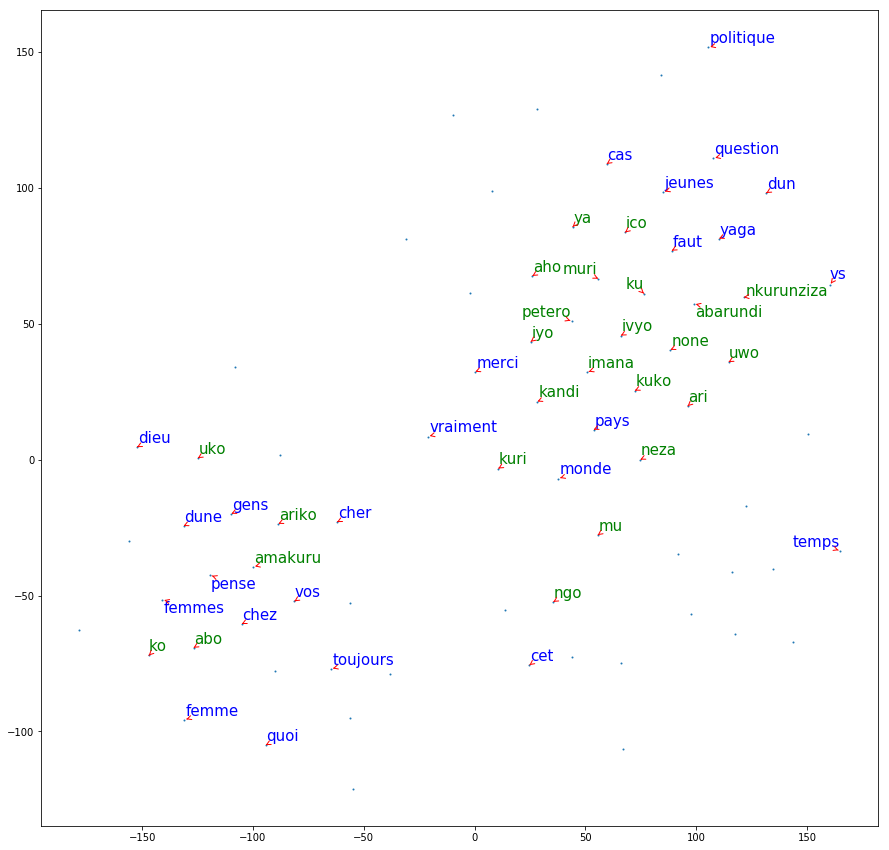

In [18]:
fig, ax = plt.subplots()
pyplot.scatter(Y[:, 0], Y[:, 1],s=1)
texts = [plt.text(Y[i, 0], Y[i, 1], word, ha='center', va='center', size=15, color=topicgroup[word]) for i, word in enumerate(words)]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

# UMAP plot

/home/sije/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


500

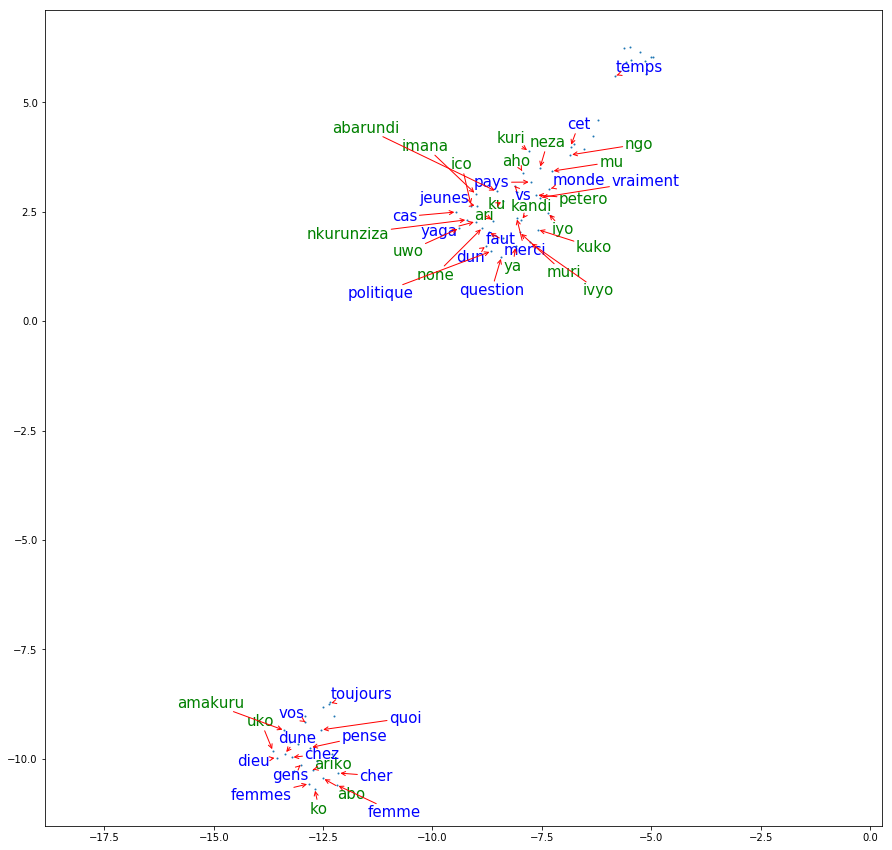

In [19]:
reducer = umap.UMAP()
model = Word2Vec(message, min_count=1000)
X = model[model.wv.vocab]
Y = reducer.fit_transform(X)
plt.scatter(Y[:, 0], Y[:, 1],s=1)
plt.gca().set_aspect('equal', 'datalim')
texts = [plt.text(Y[i, 0], Y[i, 1], word, ha='center', va='center', size=15,color=topicgroup[word]) for i, word in enumerate(words)]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))